# Homework Assignment 3 - Chem 277B
## Breast Cancer Prediction

### 1) Objective

We found in the last HW assignment that many features of the Breast Cancer Wisconsin dataset are highly correlated.
Analyze the Breast Cancer Wisconsin dataset using dimensionality reduction and classification techniques (Naive Bayes) to predict whether a tumor is benign or malignant. Compare the results to your earlier findings.

### 2) Preparation

Before starting, import the necessary libraries for data analysis and visualization. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

Load the dataset from `sklearn`, which contains cell descriptors and a target variable (diagnosis: 0 = malignant, 1 = benign).

In [2]:
data, target = load_breast_cancer(return_X_y=True, as_frame=True)
feature_names = data.columns

Split the dataset into training (50%) and testing (50%) sets this time. Use `random_state=42` for reproducibility. Scale the features to a range of [0, 1] using `MinMaxScaler`.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.50, random_state=42)

######## Fill in the code below ########
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
########################################

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of training labels: {y_train.shape}')
print(f'Shape of test features: {X_test.shape}')
print(f'Shape of test labels: {y_test.shape}')

Shape of training features: (284, 30)
Shape of training labels: (284,)
Shape of test features: (285, 30)
Shape of test labels: (285,)


### 3) Baseline results

Use the *mean radius* (the first feature) to build a Gaussian Naive Bayes classifier. Evaluate the classifier on the test set and display the confusion matrix. The results should be not as good as the result from the previous homework assignment due to the reduced training set size.

Accuracy using mean radius: 0.90


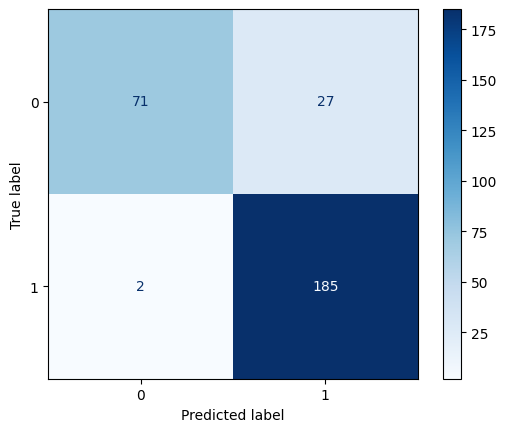

In [4]:
######## Fill in the code below ########
gnb = GaussianNB()

gnb.fit(X_train[:, [0]], y_train)
y_pred = gnb.predict(X_test[:, [0]])

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using mean radius: {accuracy:.2f}')
########################################

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 4) Principal Component Analysis

Perform PCA on the training set to reduce the dimensionality. Plot the **full** eigenvalue spectrum. How many principal components are needed to explain at least 90% of the variance in the data?

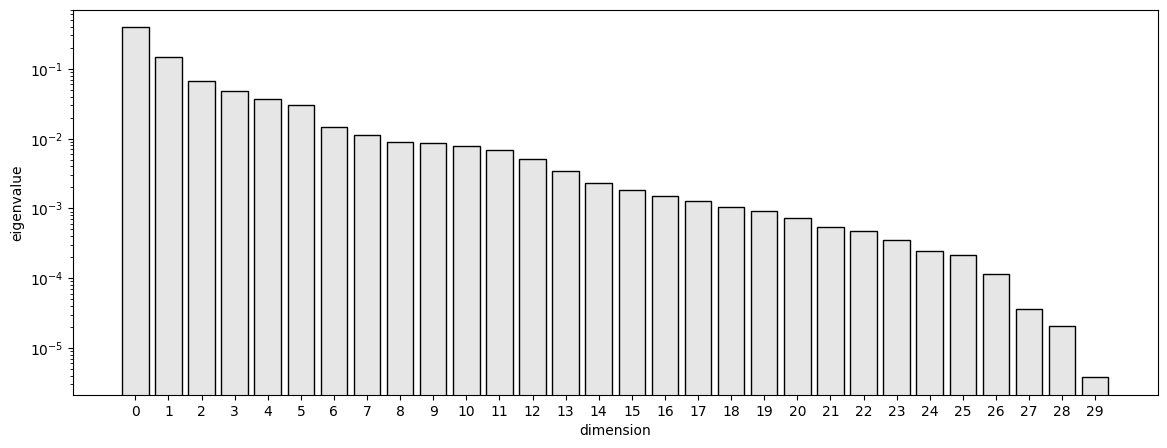

Explained variance ratio by the 6 principal components: [0.49202904 0.1823666  0.08291544 0.06044102 0.04615691 0.03838445]
Total explained variance by the 6 principal components: 0.9022934657980081


In [5]:
######## Fill in the code below ########
n_components = 30
pca          = PCA(n_components=n_components)
X_train_pca  = pca.fit_transform(X_train)
X_test_pca   = pca.transform(X_test)


eigenVal = pca.explained_variance_
xplot    = np.arange(n_components)

fig = plt.figure(figsize=(14, 5))
plt.bar(xplot, eigenVal, color = (0.9, 0.9, 0.9), edgecolor = 'black')
plt.xlabel('dimension')
plt.ylabel('eigenvalue')
plt.yscale('log')
plt.xticks(xplot)
plt.show()

n_components90 = 6
ratio          = eigenVal[:n_components90]/np.sum(eigenVal)
ratio_tot      = np.sum(eigenVal[:n_components90])/np.sum(eigenVal)
########################################



print(f'Explained variance ratio by the {n_components90} principal components: {ratio}')
print(f'Total explained variance by the {n_components90} principal components: {ratio_tot}')

PC1 explains almost 50% of the variance, and PC2 explains about 18%, etc. Together, we need 6 principal components to explain 90% of the variance.

Visualize the principal components. What are the loadings of the original features on PC1? Which features contribute most? Compare the PCA results with the correlation plot from the previous homework assignment.

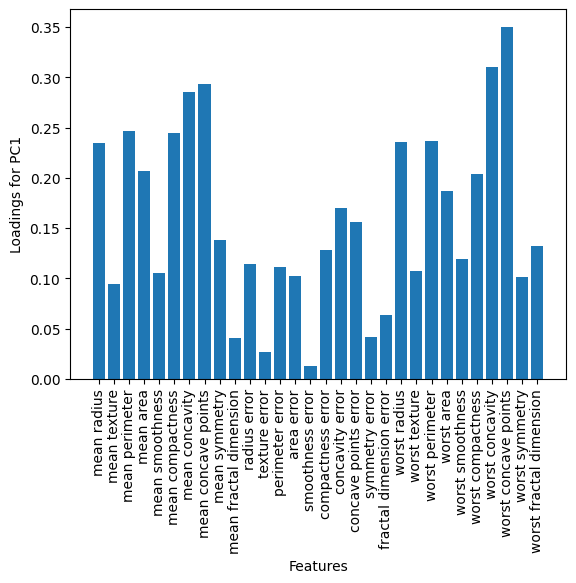

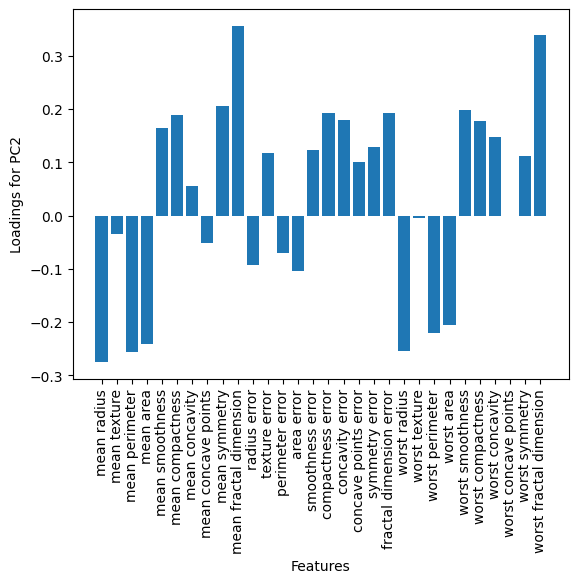

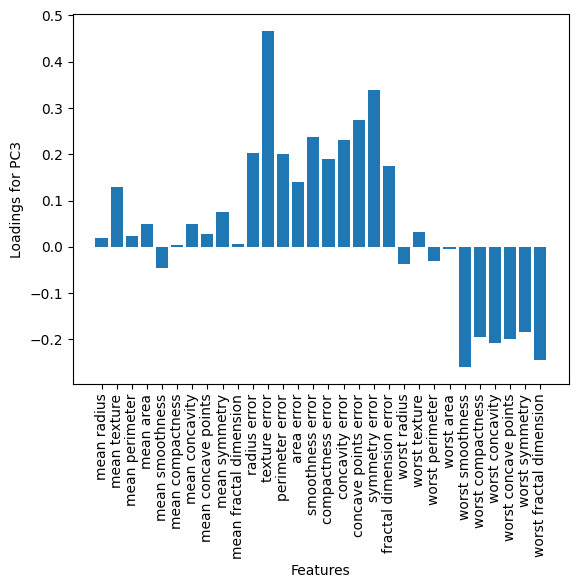

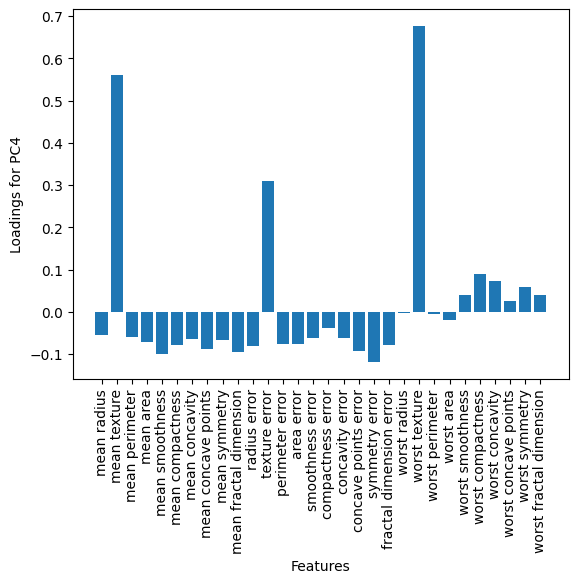

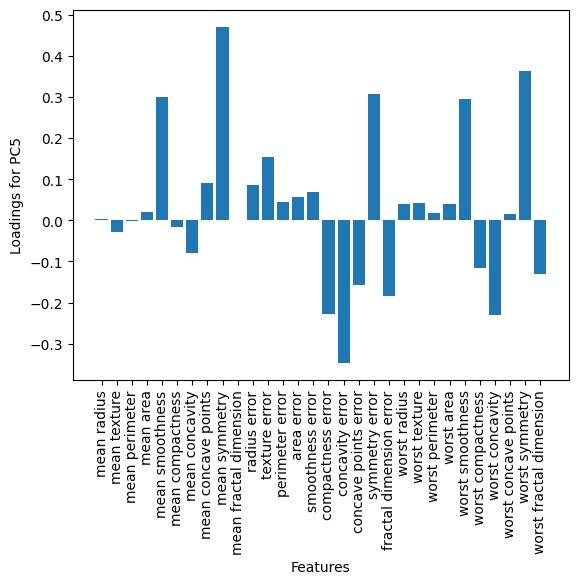

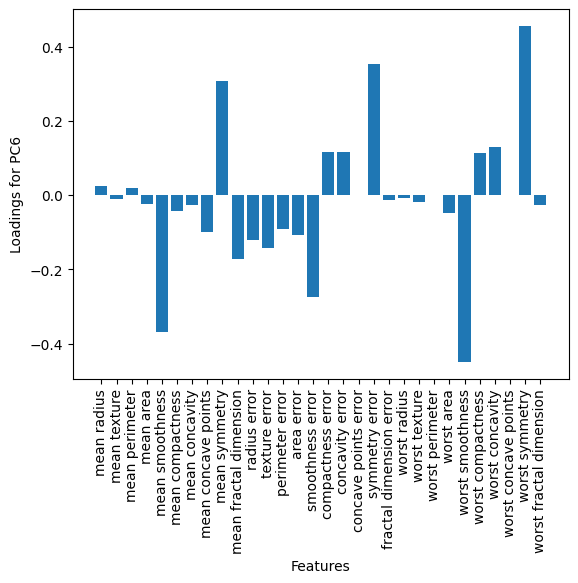

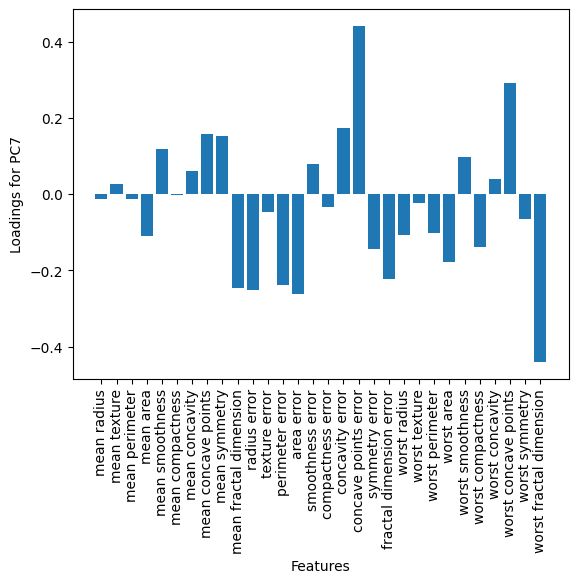

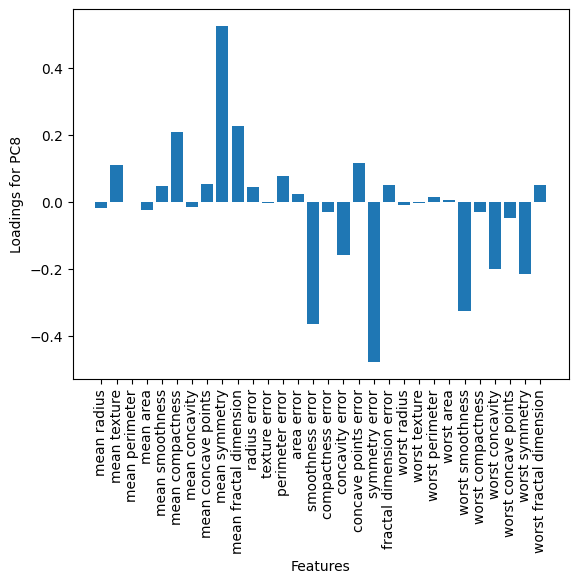

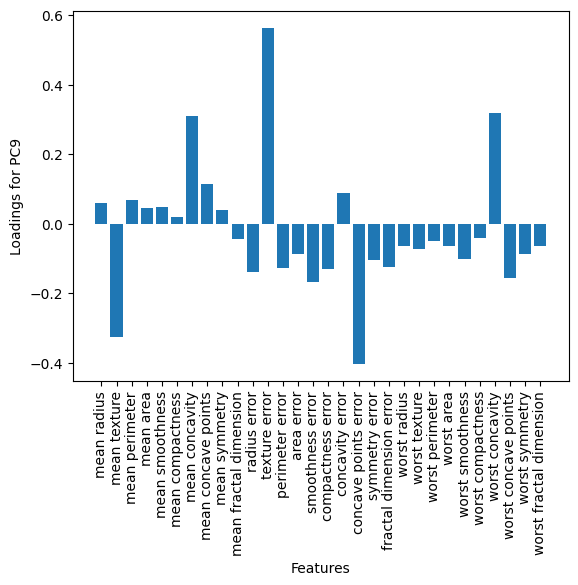

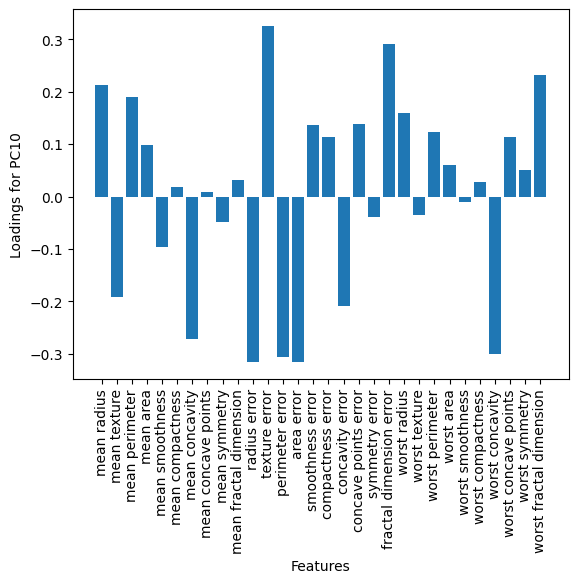

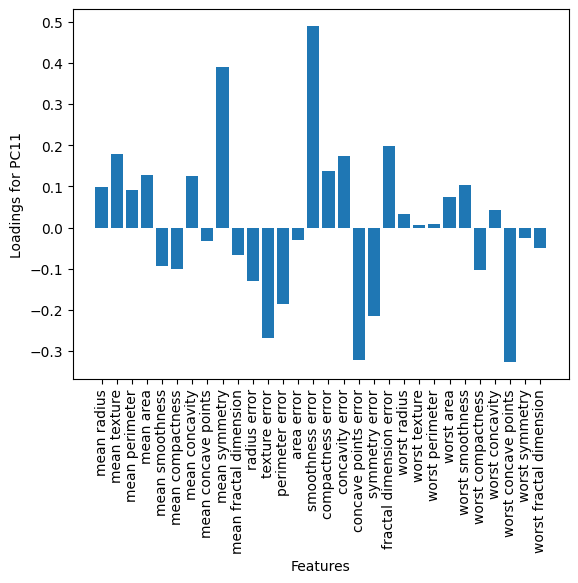

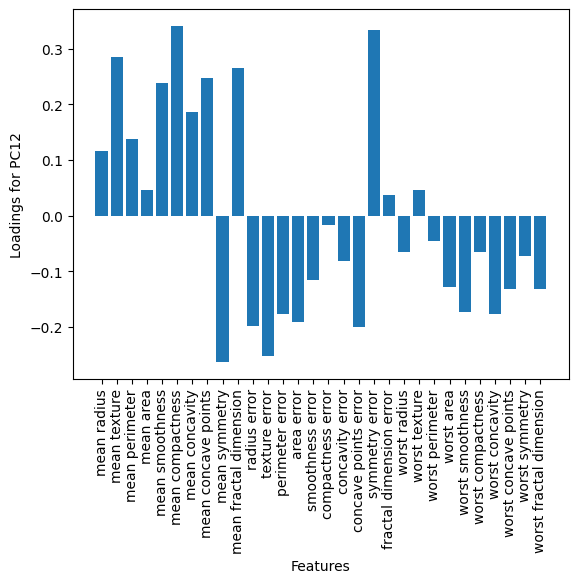

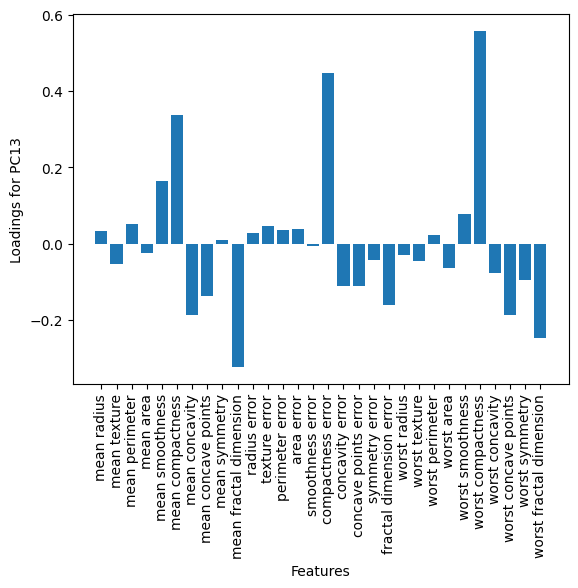

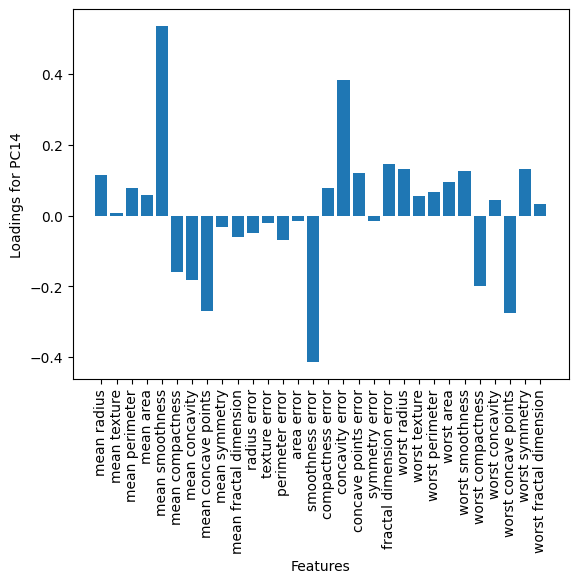

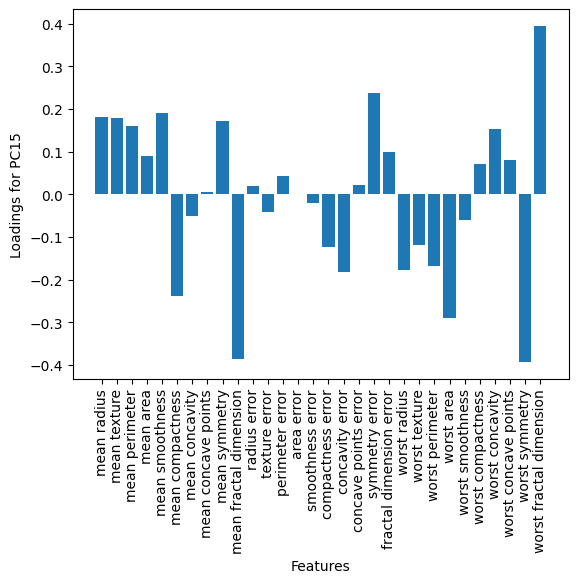

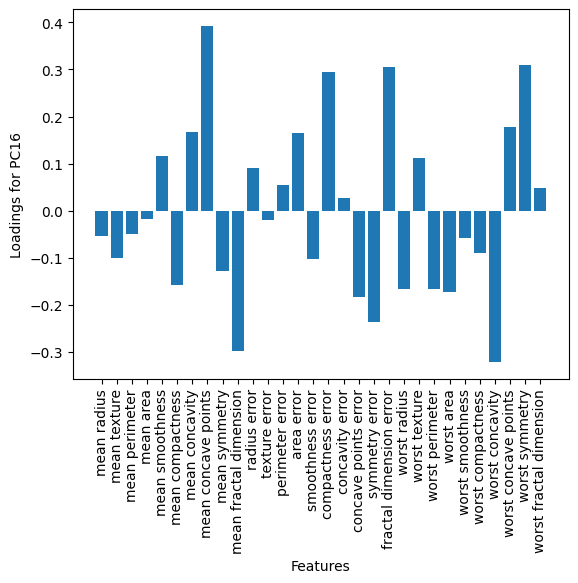

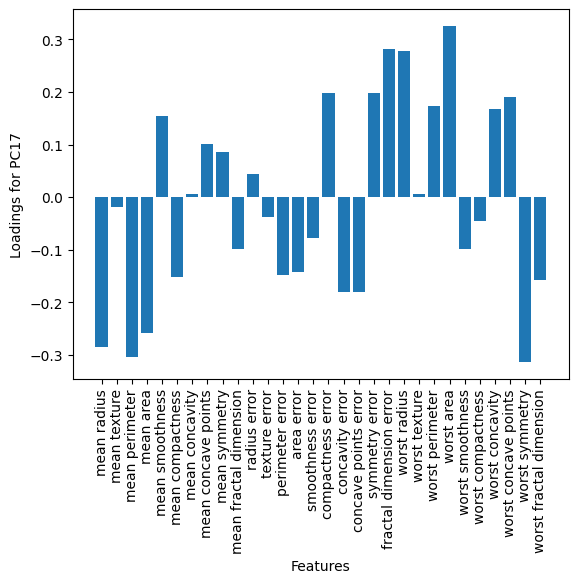

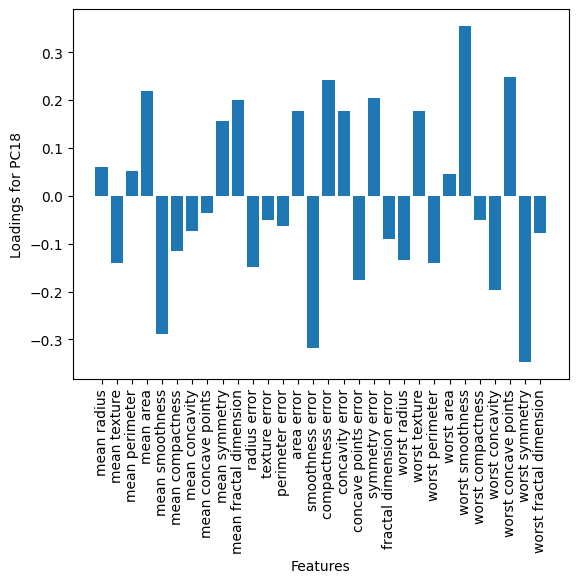

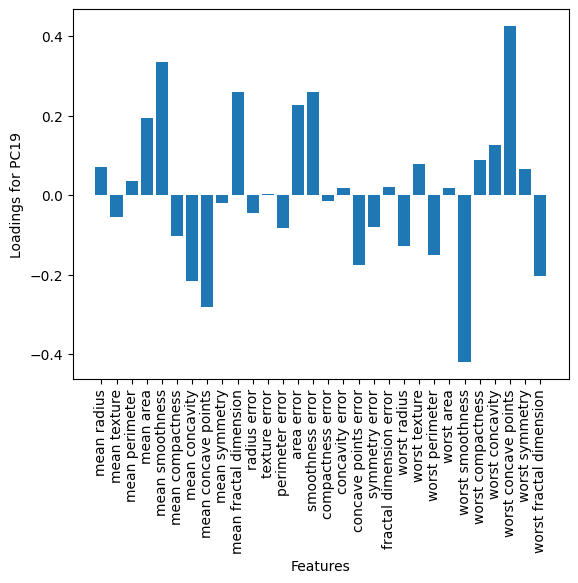

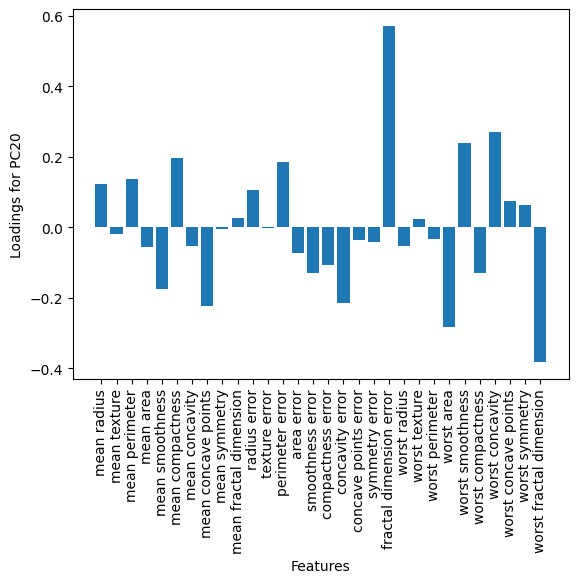

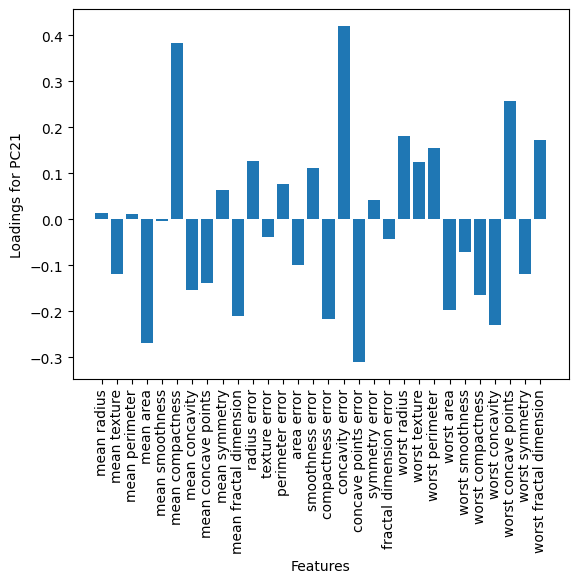

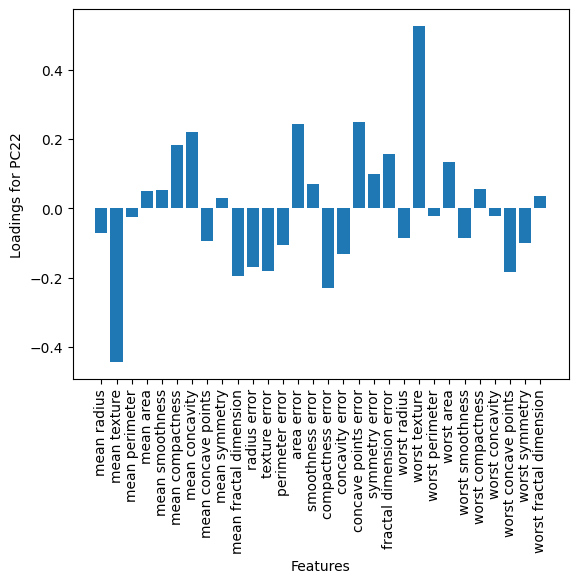

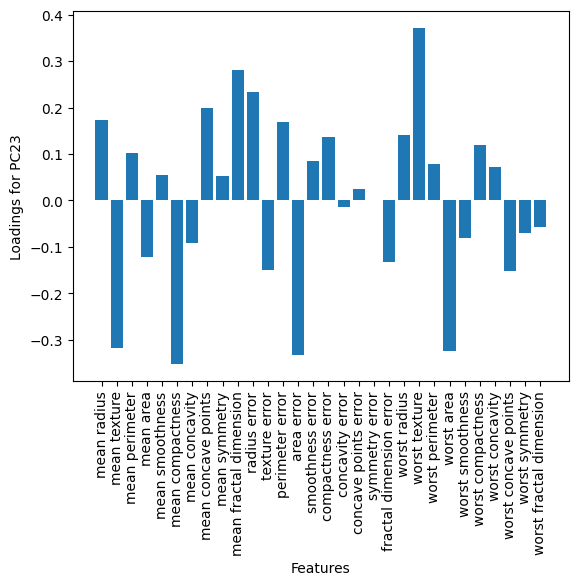

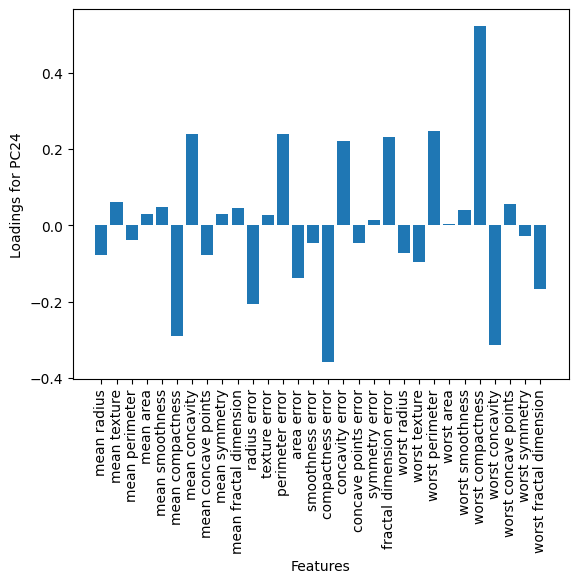

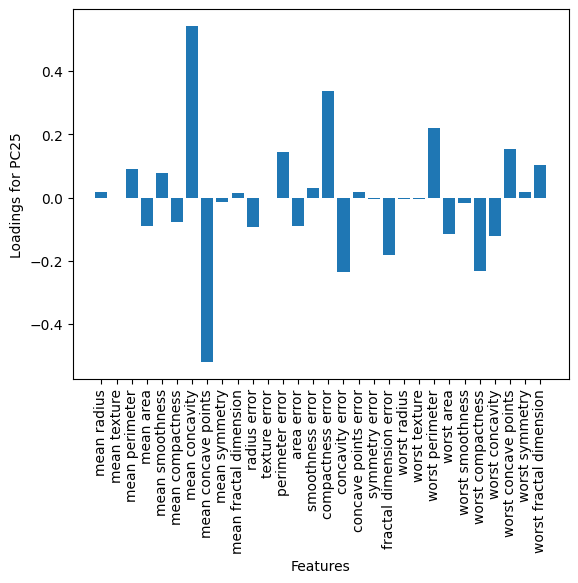

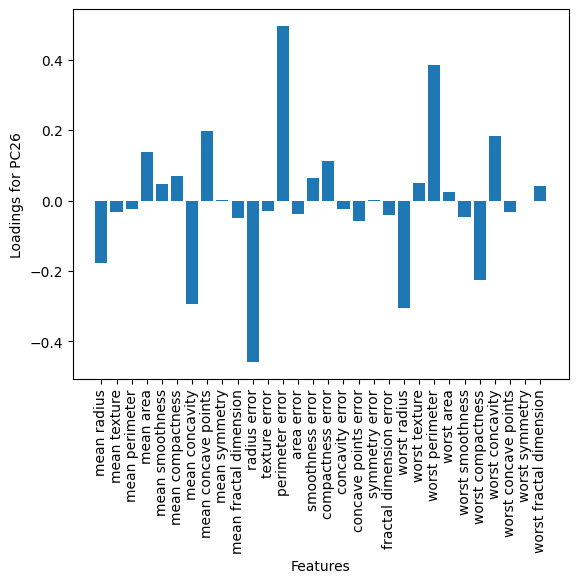

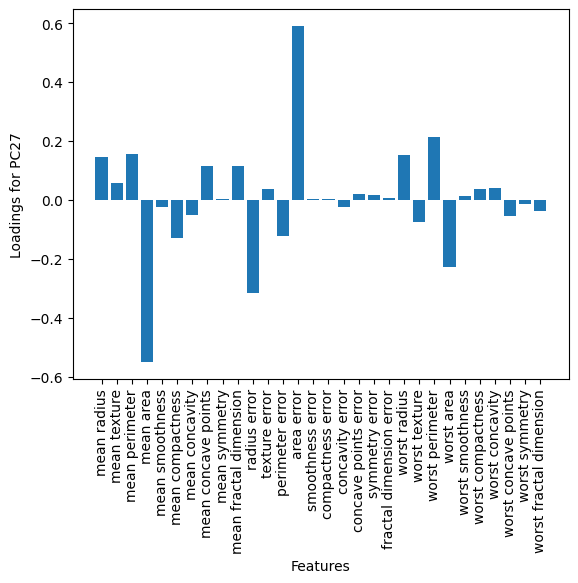

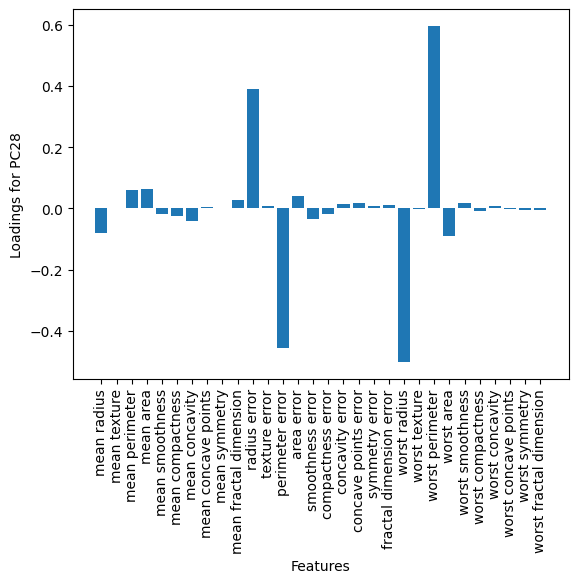

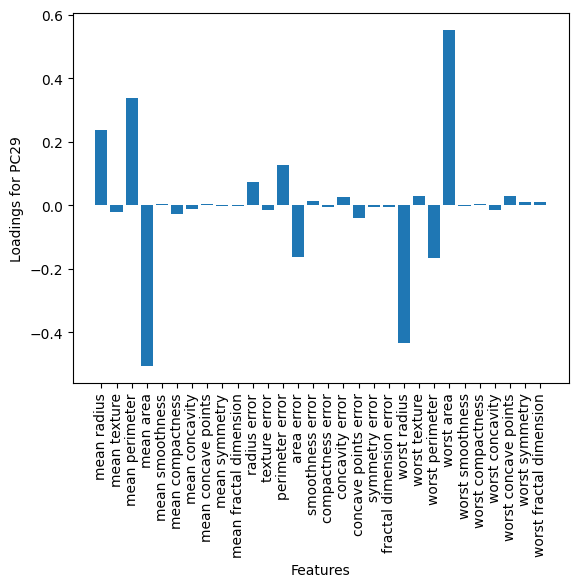

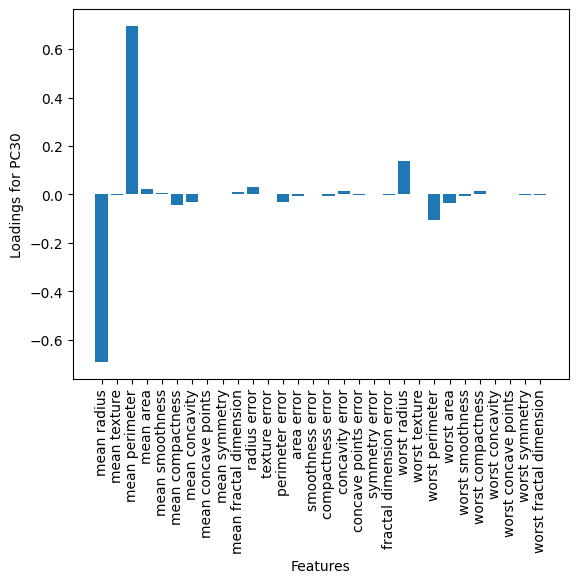

In [6]:
for i in range(n_components):
    plt.figure()

    ######## Fill in the code below ########
    plt.bar(feature_names, pca.components_[i])
    ########################################

    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{i+1}')
    plt.show()


PC1 has the highest loadings from `worst concave points`, `worst concavity`, `mean concave points`, and `mean concavity`, which are all strongly correlated in the correlation plot. There are also high loadings from highly correlated features including `mean radius`, `mean perimeter`, `mean area`, etc.

Visualize the training data with each principal component with a histogram, and the space defined by the first two principal components with a scatter plot. Color the points based on their class labels (malignant or benign). What patterns do you observe?

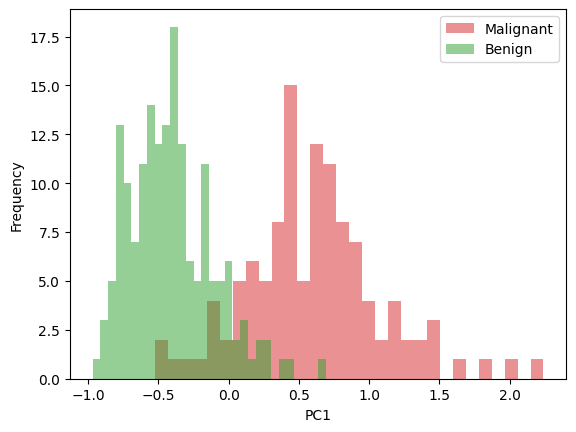

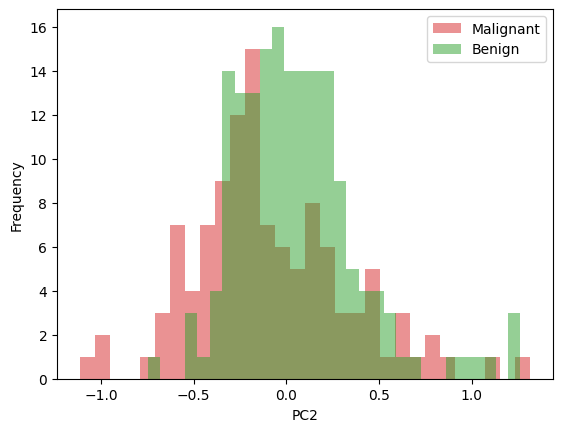

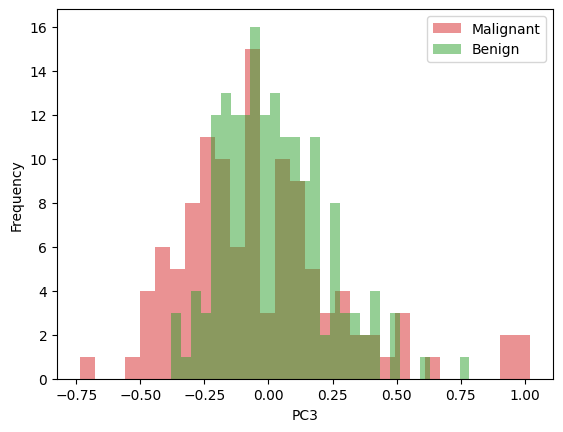

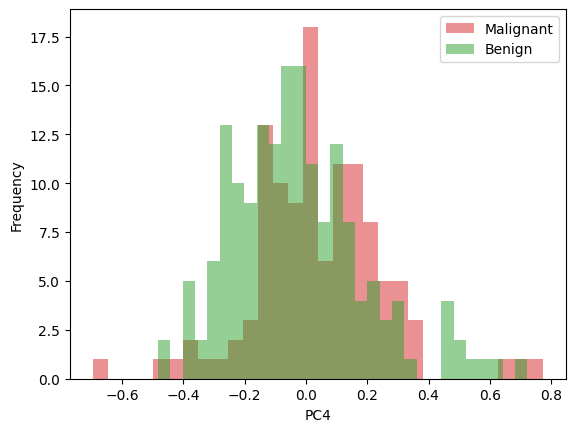

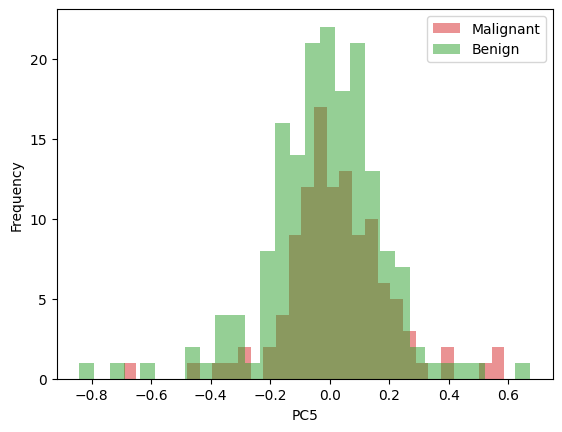

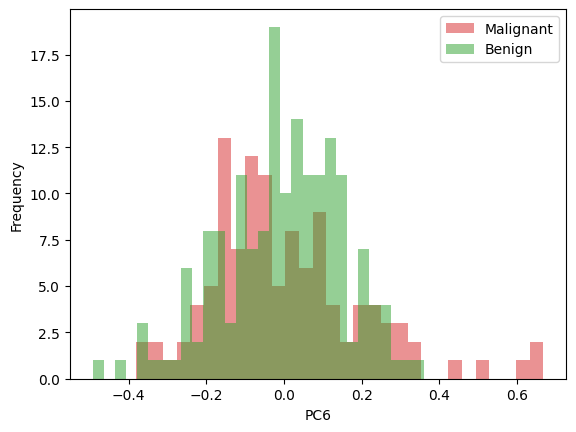

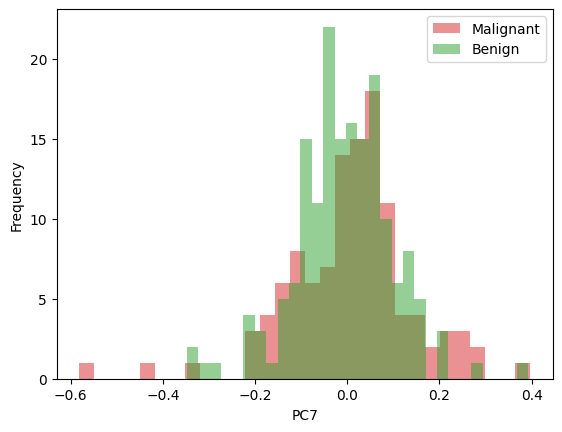

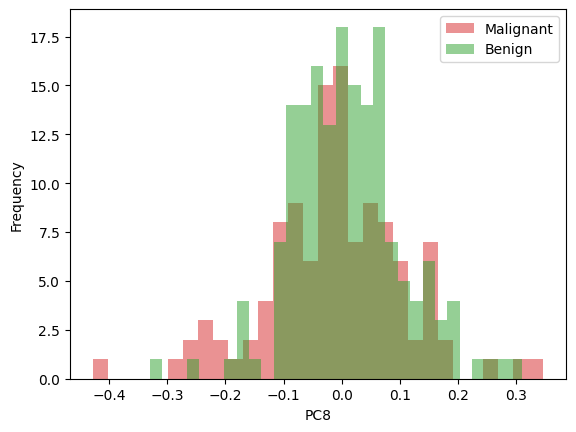

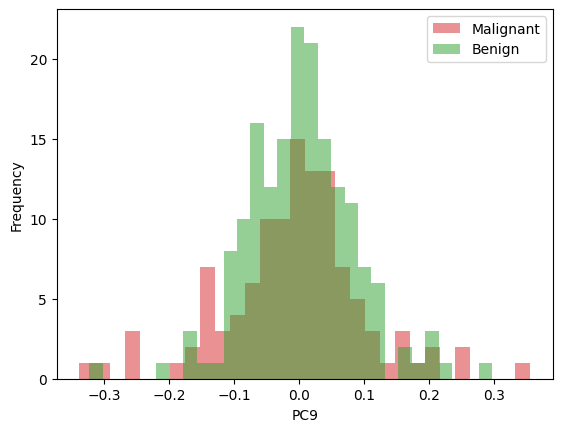

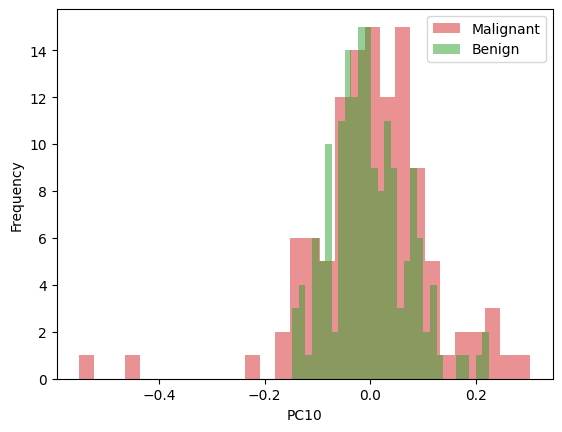

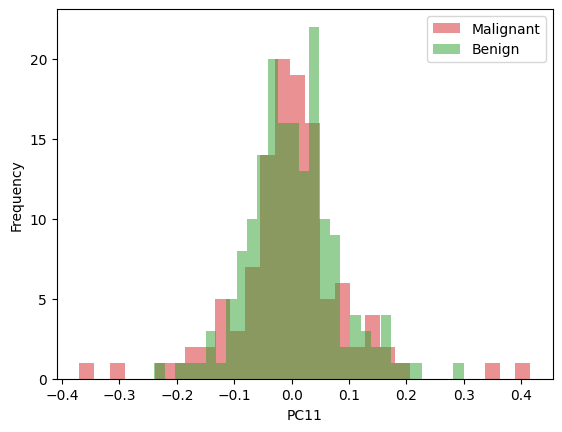

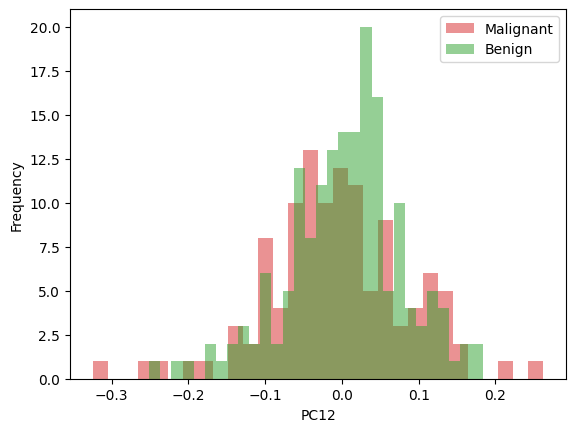

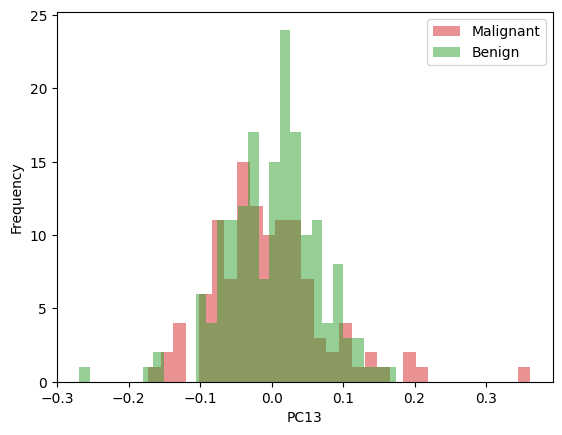

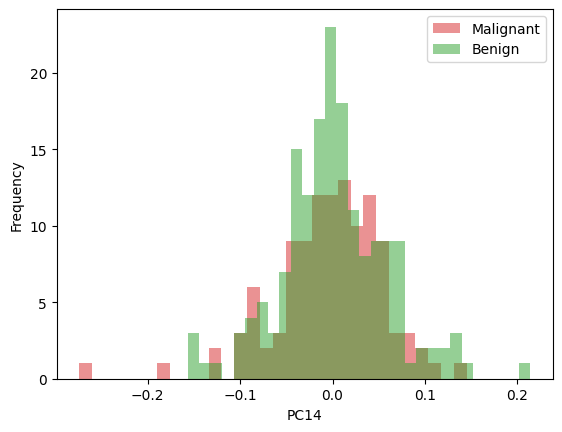

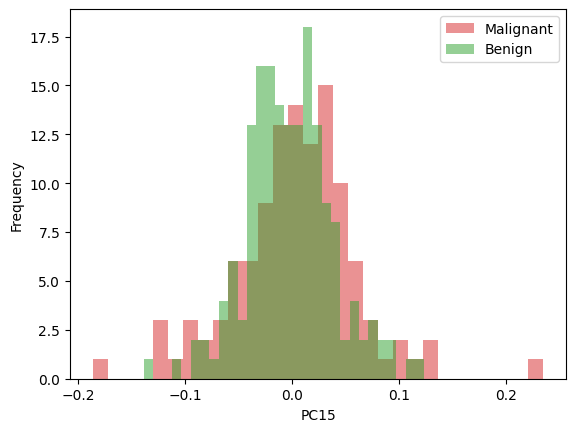

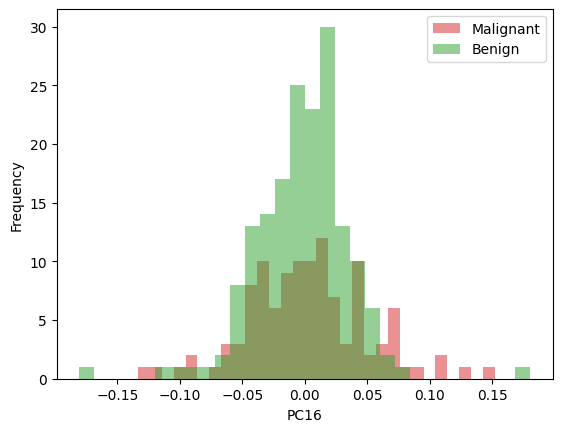

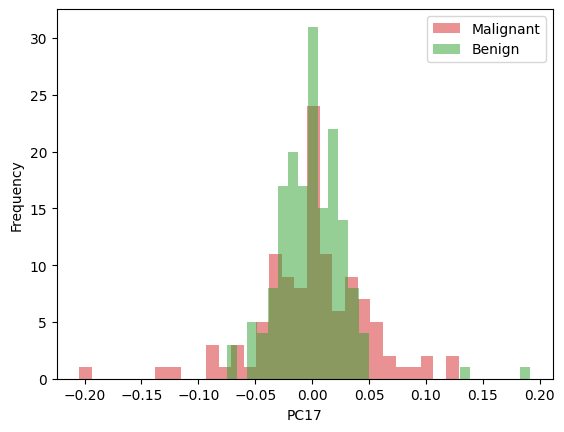

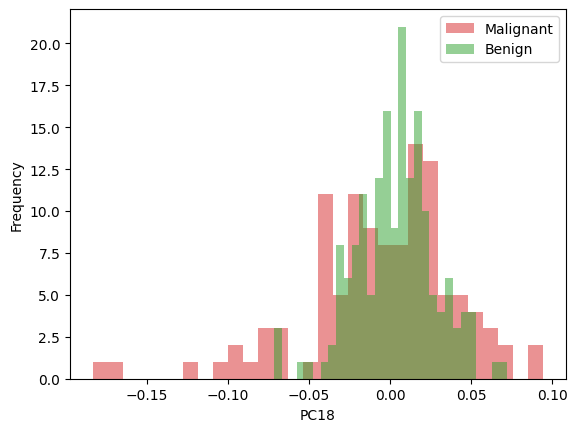

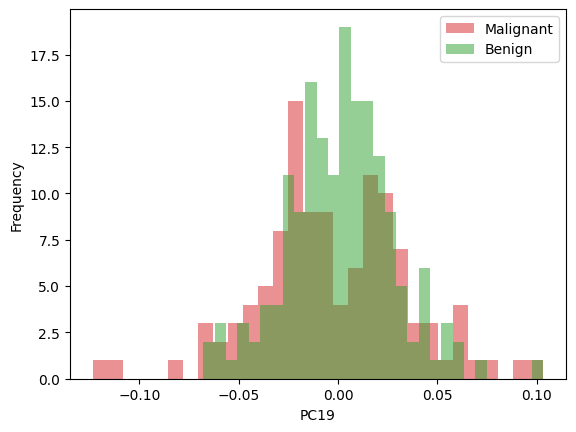

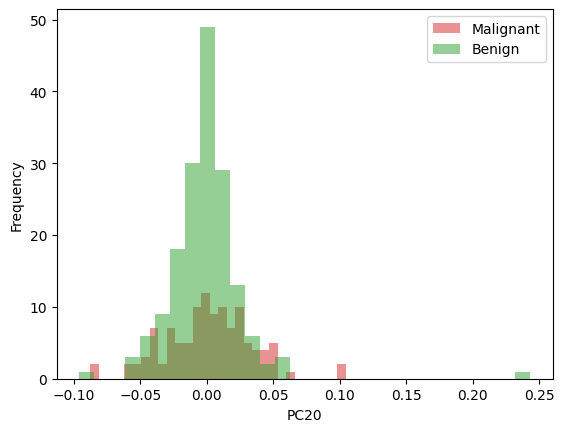

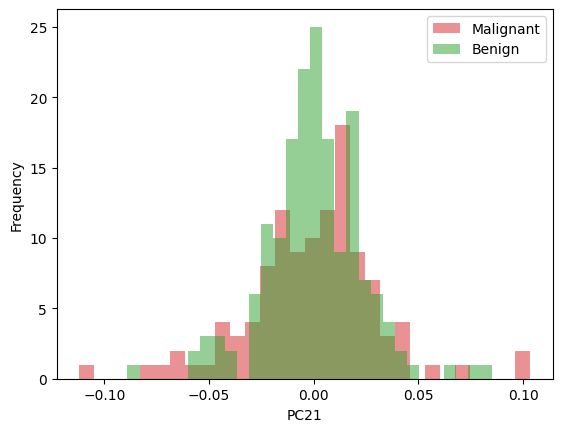

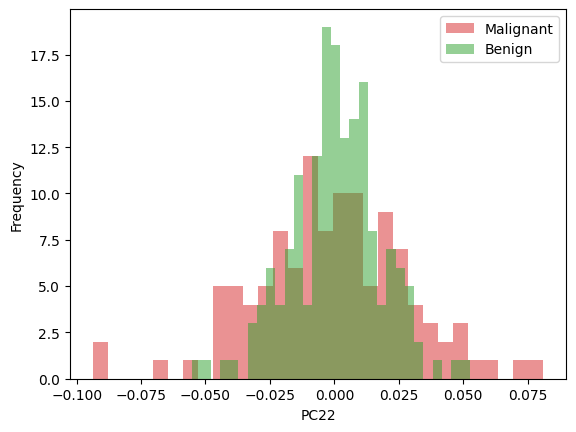

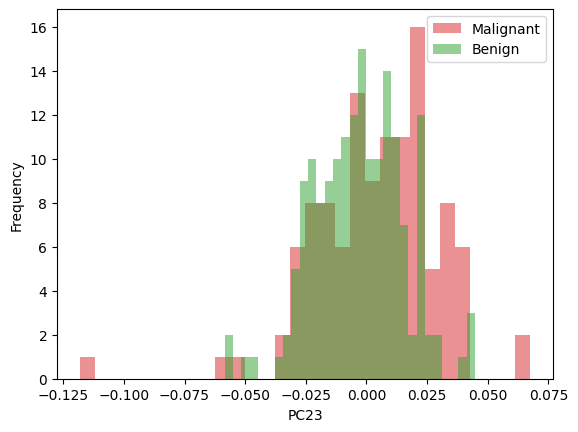

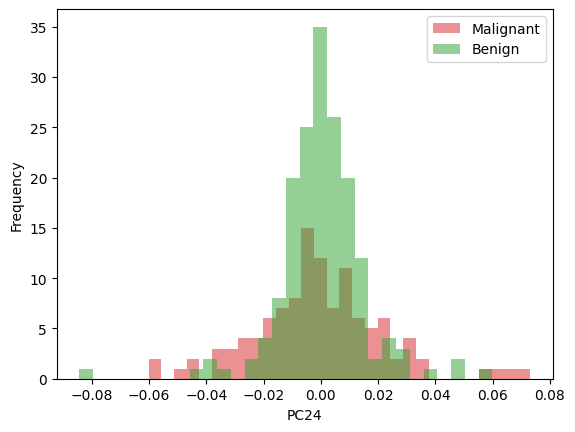

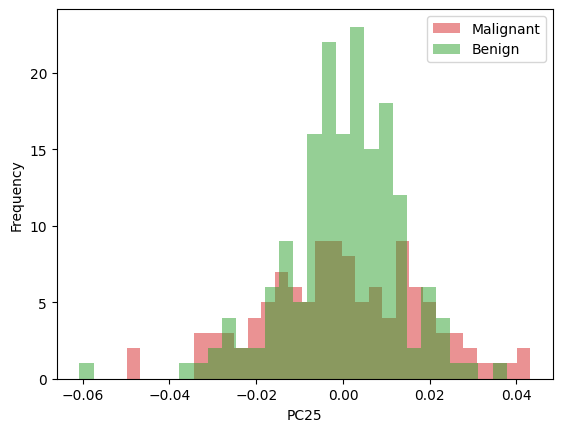

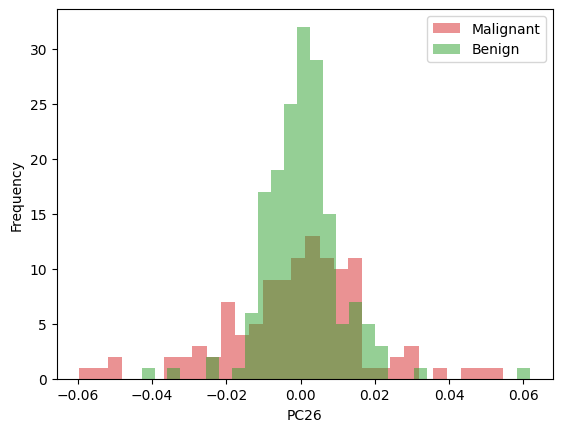

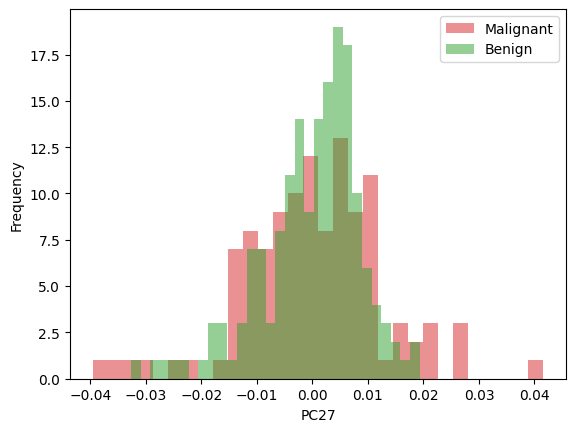

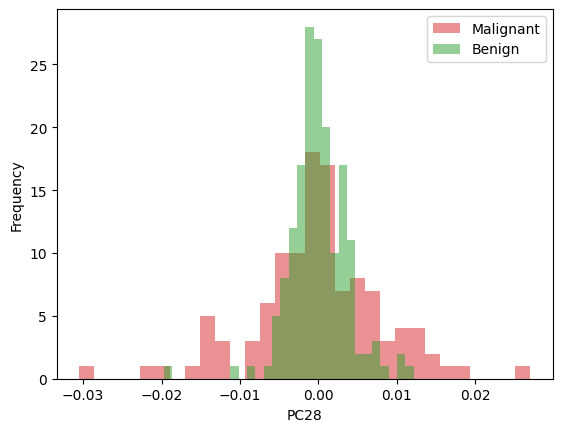

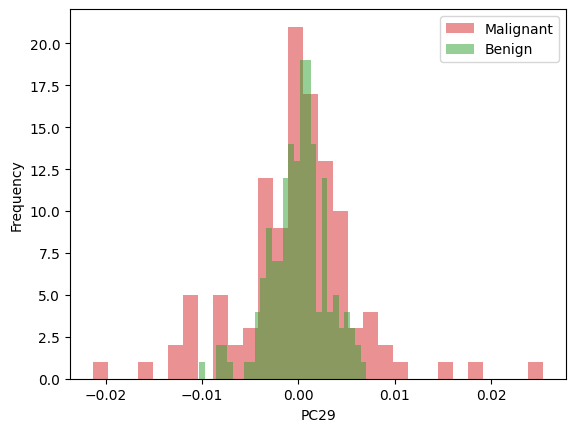

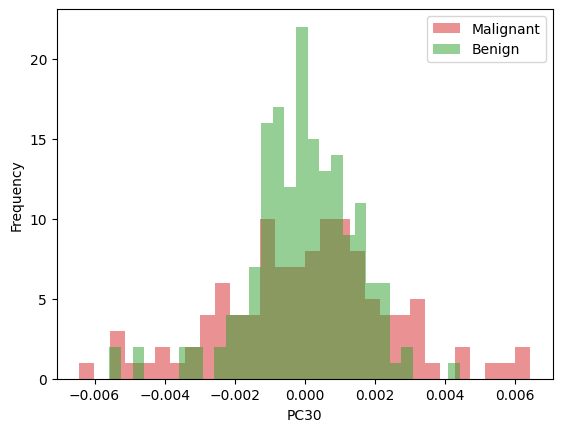

In [7]:
for i in range(n_components):
    plt.figure()

    ######## Fill in the code below ########
    plt.hist(X_train_pca[y_train==0, i], bins=30, color='tab:red', alpha=0.5, label='Malignant')
    plt.hist(X_train_pca[y_train==1, i], bins=30, color='tab:green', alpha=0.5, label='Benign')
    plt.legend()
    ########################################

    plt.xlabel(f'PC{i+1}')
    plt.ylabel('Frequency')    
    plt.show()

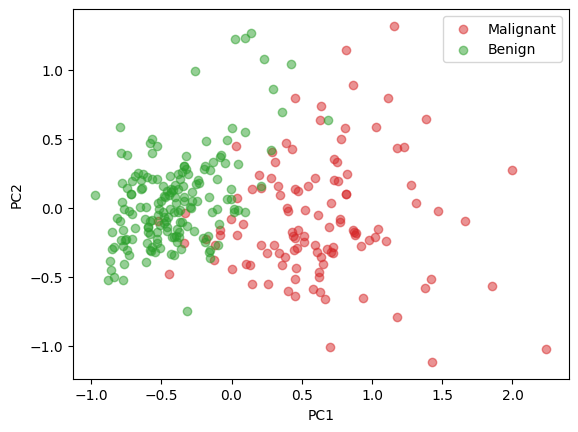

In [8]:
plt.figure()

######## Fill in the code below ########
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='tab:red', alpha=0.5, label='Malignant')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='tab:green', alpha=0.5, label='Benign')
########################################

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

PC1 separates the two classes quite well, with malignant tumors (class 0) generally having higher PC1 values and benign tumors (class 1) having lower PC1 values. There is some overlap, but the separation is more distinct than in the original feature space. Other principal components (PC2, PC3, etc.) show less clear separation between the classes.

Use the principal component(s) that best separates the classes to build a Gaussian Naive Bayes classifier. Evaluate the classifier on the test set and display the confusion matrix. Compare the results with those obtained using only the *mean radius* feature.

Accuracy using PC1: 0.93


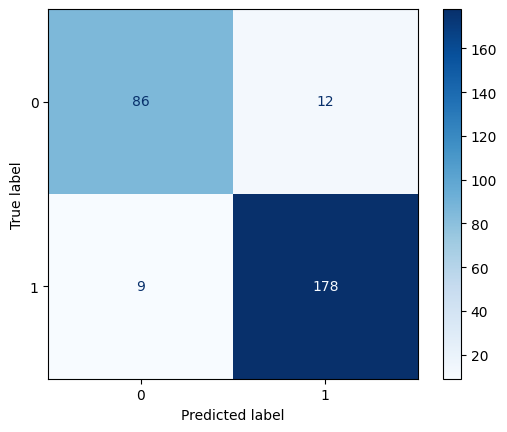

In [9]:
######## Fill in the code below ########
gnb = GaussianNB()
gnb.fit(X_train_pca[:, [0]], y_train)
y_pred = gnb.predict(X_test_pca[:, [0]])
########################################

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy using PC1: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

With PC1, the classifier performs better than using only the *mean radius* feature, even we know that *mean radius* is a good feature. This is because PC1 captures information from multiple correlated features, providing a more comprehensive representation of the data.